<a href="https://colab.research.google.com/github/AnhVietPham/Text-Mining/blob/main/word-embedding/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
import random
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from sklearn.preprocessing import OneHotEncoder
!pip install torchsummaryX  --quiet
from torchsummaryX import summary

In [47]:
docs = ["cat and mice are buddies",
        'mice lives in hole',
        'cat lives in house',
        'cat chases mice',
        'cat catches mice',
        'cat eats mice',
        'mice runs into hole',
        'cat says bad words',
        'cat and mice are pals',
        'cat and mice are chums',
        'mice stores food in hole',
        'cat stores food in house',
        'mice sleeps in hole',
        'cat sleeps in house']

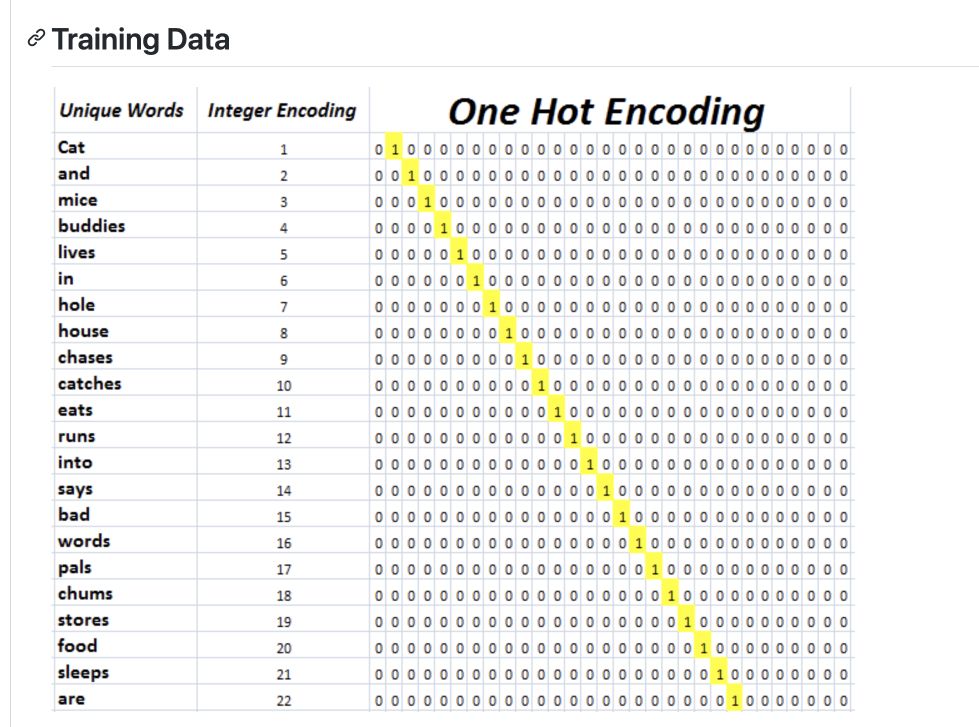

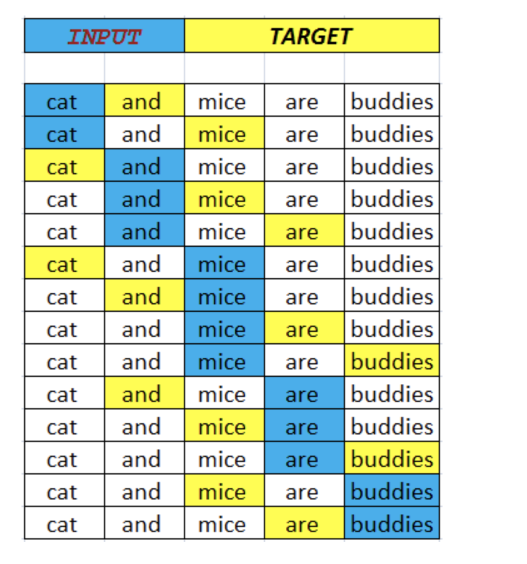

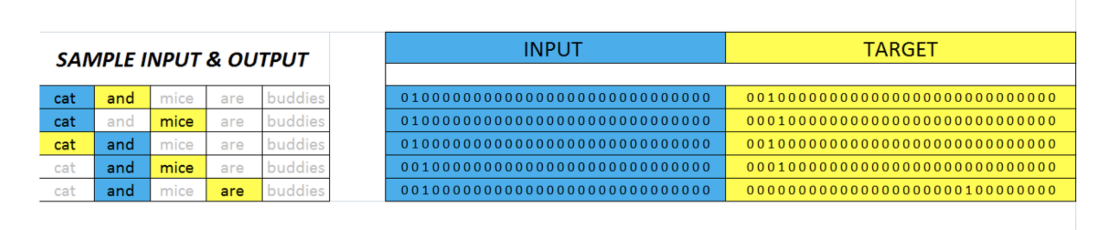

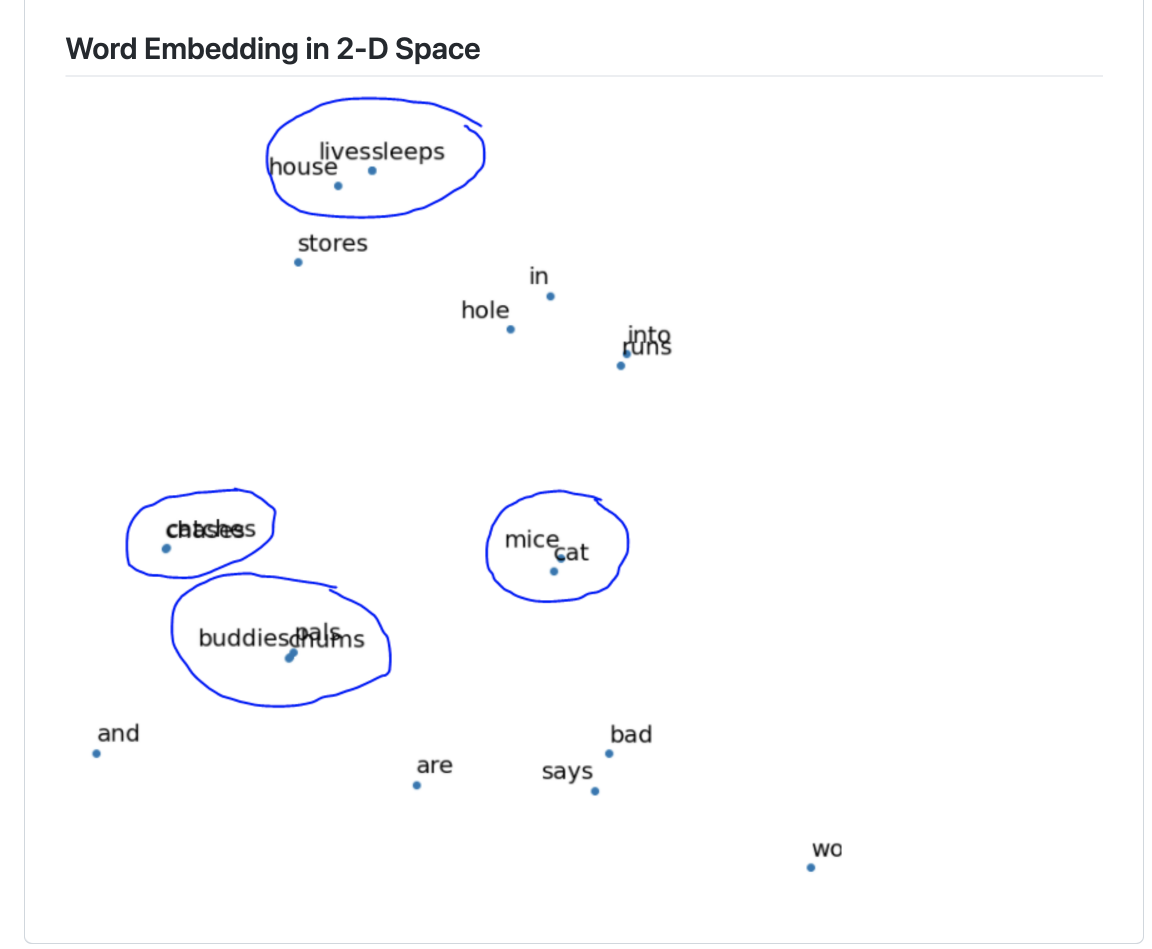

In [48]:
idx_2_word = {}
word_2_idx = {}
temp = []
i = 1
for doc in docs:
    for word in doc.split():
        if word not in temp:
            temp.append(word)
            idx_2_word[i] = word
            word_2_idx[word] = i
            i += 1

print(idx_2_word)
print(word_2_idx)

{1: 'cat', 2: 'and', 3: 'mice', 4: 'are', 5: 'buddies', 6: 'lives', 7: 'in', 8: 'hole', 9: 'house', 10: 'chases', 11: 'catches', 12: 'eats', 13: 'runs', 14: 'into', 15: 'says', 16: 'bad', 17: 'words', 18: 'pals', 19: 'chums', 20: 'stores', 21: 'food', 22: 'sleeps'}
{'cat': 1, 'and': 2, 'mice': 3, 'are': 4, 'buddies': 5, 'lives': 6, 'in': 7, 'hole': 8, 'house': 9, 'chases': 10, 'catches': 11, 'eats': 12, 'runs': 13, 'into': 14, 'says': 15, 'bad': 16, 'words': 17, 'pals': 18, 'chums': 19, 'stores': 20, 'food': 21, 'sleeps': 22}


In [49]:
vocab_size = 25

def one_hot_map(doc):
    x = []
    for word in doc.split():
        x.append(word_2_idx[word])
    return x
  
encoded_docs = [one_hot_map(d) for d in docs]
encoded_docs

[[1, 2, 3, 4, 5],
 [3, 6, 7, 8],
 [1, 6, 7, 9],
 [1, 10, 3],
 [1, 11, 3],
 [1, 12, 3],
 [3, 13, 14, 8],
 [1, 15, 16, 17],
 [1, 2, 3, 4, 18],
 [1, 2, 3, 4, 19],
 [3, 20, 21, 7, 8],
 [1, 20, 21, 7, 9],
 [3, 22, 7, 8],
 [1, 22, 7, 9]]

In [50]:
max_len = 10
padded_docs = pad_sequences(encoded_docs, maxlen=max_len, padding='post')
padded_docs

array([[ 1,  2,  3,  4,  5,  0,  0,  0,  0,  0],
       [ 3,  6,  7,  8,  0,  0,  0,  0,  0,  0],
       [ 1,  6,  7,  9,  0,  0,  0,  0,  0,  0],
       [ 1, 10,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 11,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 12,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 13, 14,  8,  0,  0,  0,  0,  0,  0],
       [ 1, 15, 16, 17,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  3,  4, 18,  0,  0,  0,  0,  0],
       [ 1,  2,  3,  4, 19,  0,  0,  0,  0,  0],
       [ 3, 20, 21,  7,  8,  0,  0,  0,  0,  0],
       [ 1, 20, 21,  7,  9,  0,  0,  0,  0,  0],
       [ 3, 22,  7,  8,  0,  0,  0,  0,  0,  0],
       [ 1, 22,  7,  9,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [51]:
training_data = np.empty((0,2))

window = 2
for sentence in padded_docs:
    sent_len = len(sentence)
    
    for i, word in enumerate(sentence):
        w_context = []
        if sentence[i] != 0:
            w_target = sentence[i]
            for j in range(i-window, i + window + 1):
                if j != i and j <= sent_len -1 and j >=0 and sentence[j]!=0:
                    w_context = sentence[j]
                    training_data = np.append(training_data, [[w_target, w_context]], axis=0)

print(len(training_data))
print(training_data.shape)
training_data


148
(148, 2)


array([[ 1.,  2.],
       [ 1.,  3.],
       [ 2.,  1.],
       [ 2.,  3.],
       [ 2.,  4.],
       [ 3.,  1.],
       [ 3.,  2.],
       [ 3.,  4.],
       [ 3.,  5.],
       [ 4.,  2.],
       [ 4.,  3.],
       [ 4.,  5.],
       [ 5.,  3.],
       [ 5.,  4.],
       [ 3.,  6.],
       [ 3.,  7.],
       [ 6.,  3.],
       [ 6.,  7.],
       [ 6.,  8.],
       [ 7.,  3.],
       [ 7.,  6.],
       [ 7.,  8.],
       [ 8.,  6.],
       [ 8.,  7.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 6.,  1.],
       [ 6.,  7.],
       [ 6.,  9.],
       [ 7.,  1.],
       [ 7.,  6.],
       [ 7.,  9.],
       [ 9.,  6.],
       [ 9.,  7.],
       [ 1., 10.],
       [ 1.,  3.],
       [10.,  1.],
       [10.,  3.],
       [ 3.,  1.],
       [ 3., 10.],
       [ 1., 11.],
       [ 1.,  3.],
       [11.,  1.],
       [11.,  3.],
       [ 3.,  1.],
       [ 3., 11.],
       [ 1., 12.],
       [ 1.,  3.],
       [12.,  1.],
       [12.,  3.],
       [ 3.,  1.],
       [ 3., 12.],
       [ 3.,

In [52]:
enc = OneHotEncoder()
enc.fit(np.array(range(30)).reshape(-1,1))
onehot_label_x = enc.transform(training_data[:,0].reshape(-1,1)).toarray()
onehot_label_x

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
enc = OneHotEncoder()
enc.fit(np.array(range(30)).reshape(-1,1))
onehot_label_y = enc.transform(training_data[:,1].reshape(-1,1)).toarray()
onehot_label_y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
print(onehot_label_x[0])
print(onehot_label_y[0])

# From Numpy to Torch

onehot_label_x = torch.from_numpy(onehot_label_x)
onehot_label_y = torch.from_numpy(onehot_label_y)
print(onehot_label_x.shape, onehot_label_y.shape)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
torch.Size([148, 30]) torch.Size([148, 30])


In [55]:
class WEMB(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(WEMB, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.softmax = nn.Softmax(dim=1)
    
        self.l1 = nn.Linear(self.input_size, self.hidden_size, bias=False)
        self.l2 = nn.Linear(self.hidden_size, self.input_size, bias=False)
   
    def forward(self, x):
        out_bn = self.l1(x) # bn - bottle_neck
        out = self.l2(out_bn)
        out = self.softmax(out)
        return out, out_bn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [56]:
input_size = 30
hidden_size = 2
learning_rate = 0.01
num_epochs = 5000

untrained_model = WEMB(input_size, hidden_size).to(device)
model = WEMB(input_size, hidden_size).to(device)
model.train(True)
print(model)
print()

# Loss and optimizer
criterion = nn.BCELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)
summary(model, torch.ones((1,30)).to(device)) 

WEMB(
  (softmax): Softmax(dim=1)
  (l1): Linear(in_features=30, out_features=2, bias=False)
  (l2): Linear(in_features=2, out_features=30, bias=False)
)

          Kernel Shape Output Shape Params Mult-Adds
Layer                                               
0_l1           [30, 2]       [1, 2]   60.0      60.0
1_l2           [2, 30]      [1, 30]   60.0      60.0
2_softmax            -      [1, 30]      -         -
------------------------------------------------------
                      Totals
Total params           120.0
Trainable params       120.0
Non-trainable params     0.0
Mult-Adds              120.0


/usr/local/lib/python3.7/dist-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_l1,"[30, 2]","[1, 2]",60.0,60.0
1_l2,"[2, 30]","[1, 30]",60.0,60.0
2_softmax,-,"[1, 30]",NaN,NaN


Epoch [100/5000], Loss: 0.1456
Epoch [200/5000], Loss: 0.1431
Epoch [300/5000], Loss: 0.1397
Epoch [400/5000], Loss: 0.1348
Epoch [500/5000], Loss: 0.1277
Epoch [600/5000], Loss: 0.1178
Epoch [700/5000], Loss: 0.1049
Epoch [800/5000], Loss: 0.0903
Epoch [900/5000], Loss: 0.0775
Epoch [1000/5000], Loss: 0.0692
Epoch [1100/5000], Loss: 0.0653
Epoch [1200/5000], Loss: 0.0641
Epoch [1300/5000], Loss: 0.0643
Epoch [1400/5000], Loss: 0.0652
Epoch [1500/5000], Loss: 0.0663
Epoch [1600/5000], Loss: 0.0676
Epoch [1700/5000], Loss: 0.0689
Epoch [1800/5000], Loss: 0.0702
Epoch [1900/5000], Loss: 0.0714
Epoch [2000/5000], Loss: 0.0725
Epoch [2100/5000], Loss: 0.0736
Epoch [2200/5000], Loss: 0.0745
Epoch [2300/5000], Loss: 0.0753
Epoch [2400/5000], Loss: 0.0760
Epoch [2500/5000], Loss: 0.0765
Epoch [2600/5000], Loss: 0.0769
Epoch [2700/5000], Loss: 0.0771
Epoch [2800/5000], Loss: 0.0772
Epoch [2900/5000], Loss: 0.0772
Epoch [3000/5000], Loss: 0.0770
Epoch [3100/5000], Loss: 0.0767
Epoch [3200/5000]

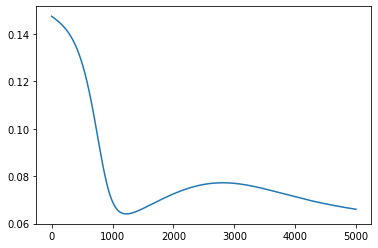

In [57]:
loss_val = []
onehot_label_x = onehot_label_x.to(device)
onehot_label_y = onehot_label_y.to(device)

for epoch in range(num_epochs):
    for i in range(onehot_label_y.shape[0]):
        inputs = onehot_label_x[i].float()
        labels = onehot_label_y[i].float()
        inputs = inputs.unsqueeze(0)
        labels = labels.unsqueeze(0)

      # Forward pass
        output, wemb = model(inputs)
        loss = criterion(output, labels)

      # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_val.append(loss.item())

    if (epoch+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(loss_val)

In [58]:
docs = ['cat and mice are buddies hole lives in house chases catches runs into says bad words pals chums stores sleeps']
encoded_docs = [one_hot_map(d) for d in docs]

test_arr = np.array([[ 1.,  2., 3., 4., 5., 8., 6., 7., 9., 10., 11., 13., 14., 15., 16., 17., 18., 19., 20., 22.]])
test = enc.transform(test_arr.reshape(-1,1)).toarray()

output = []
for i in range(test.shape[0]):
    _, wemb2 = model(torch.from_numpy(test[i]).unsqueeze(0).float().to(device))
    wemb2 = wemb2[0].detach().cpu().numpy()
    output.append(wemb2)
print(len(output))
print(output)

20
[array([0.05550937, 0.7079309 ], dtype=float32), array([0.70323783, 1.8105063 ], dtype=float32), array([0.08995871, 0.6912057 ], dtype=float32), array([-1.9478922,  2.162475 ], dtype=float32), array([0.17229009, 1.6538026 ], dtype=float32), array([1.3605431 , 0.29743716], dtype=float32), array([2.1661685, 0.8952677], dtype=float32), array([1.6599206 , 0.17302051], dtype=float32), array([2.345604  , 0.57494104], dtype=float32), array([0.8405896, 1.7785476], dtype=float32), array([0.80851454, 1.7774837 ], dtype=float32), array([0.6591212, 0.5840768], dtype=float32), array([0.6200904 , 0.61453384], dtype=float32), array([ 0.19389029, -0.5027701 ], dtype=float32), array([ 0.19204955, -0.33931082], dtype=float32), array([-0.91002405, -1.4728976 ], dtype=float32), array([0.2026861, 1.64903  ], dtype=float32), array([0.2057065, 1.6542327], dtype=float32), array([2.1089842, 1.1445735], dtype=float32), array([2.1756437, 0.8980715], dtype=float32)]


In [59]:
docs = ['cat', 'and', 'mice', 'are', 'buddies', 'hole', 'lives', 'in', 'house', 'chases', 'catches', 'runs', 'into', 'says', 'bad', 'words', 'pals', 'chums', 'stores', 'sleeps']
for i in range(0, len(docs)):
    print("Word - {} - It's Word Embeddings : {:.3} & {:.3} -".format(docs[i], output[i][0], output[i][0]))

Word - cat - It's Word Embeddings : 0.0555 & 0.0555 -
Word - and - It's Word Embeddings : 0.703 & 0.703 -
Word - mice - It's Word Embeddings : 0.09 & 0.09 -
Word - are - It's Word Embeddings : -1.95 & -1.95 -
Word - buddies - It's Word Embeddings : 0.172 & 0.172 -
Word - hole - It's Word Embeddings : 1.36 & 1.36 -
Word - lives - It's Word Embeddings : 2.17 & 2.17 -
Word - in - It's Word Embeddings : 1.66 & 1.66 -
Word - house - It's Word Embeddings : 2.35 & 2.35 -
Word - chases - It's Word Embeddings : 0.841 & 0.841 -
Word - catches - It's Word Embeddings : 0.809 & 0.809 -
Word - runs - It's Word Embeddings : 0.659 & 0.659 -
Word - into - It's Word Embeddings : 0.62 & 0.62 -
Word - says - It's Word Embeddings : 0.194 & 0.194 -
Word - bad - It's Word Embeddings : 0.192 & 0.192 -
Word - words - It's Word Embeddings : -0.91 & -0.91 -
Word - pals - It's Word Embeddings : 0.203 & 0.203 -
Word - chums - It's Word Embeddings : 0.206 & 0.206 -
Word - stores - It's Word Embeddings : 2.11 & 2.11

[0.05550937, 0.70323783, 0.089958705, -1.9478922, 0.17229009, 1.3605431, 2.1661685, 1.6599206, 2.345604, 0.8405896, 0.80851454, 0.6591212, 0.6200904, 0.19389029, 0.19204955, -0.91002405, 0.2026861, 0.2057065, 2.1089842, 2.1756437] [0.7079309, 1.8105063, 0.6912057, 2.162475, 1.6538026, 0.29743716, 0.8952677, 0.17302051, 0.57494104, 1.7785476, 1.7774837, 0.5840768, 0.61453384, -0.5027701, -0.33931082, -1.4728976, 1.64903, 1.6542327, 1.1445735, 0.8980715]


<Figure size 432x288 with 0 Axes>

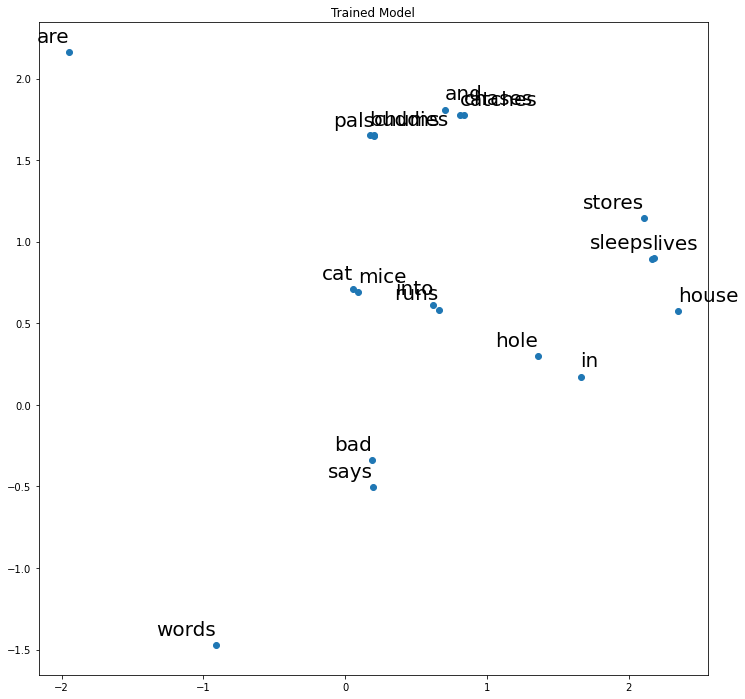

In [60]:
xs = []
ys = []
for i in range(len(output)):
    xs.append(output[i][0])
    ys.append(output[i][1])
print(xs, ys)

docs = ['cat', 'and', 'mice', 'are', 'buddies', 'hole', 'lives', 'in', 'house', 'chases', 'catches', 'runs', 'into', 'says', 'bad', 'words', 'pals', \
        'chums', 'stores', 'sleeps']

plt.clf()
plt.figure(figsize=(12,12))
plt.scatter(xs,ys)
label = docs

for i,(x,y) in enumerate(zip(xs,ys)):
    plt.annotate(label[i], (x,y), textcoords="offset points", xytext=(0,10), fontsize=20, ha = random.choice(['left', 'right']))
    plt.title("Trained Model")
plt.show()

In [61]:
import plotly
import plotly.express as px

import plotly.express as px
fig = px.scatter(x=xs, y=ys, text=docs, size_max=100)
fig.update_traces(textposition= random.choice(['top center', 'bottom center','bottom left']))
fig.update_layout(height=800,title_text='Custom Word Embeddings')
fig.show()

20
[array([-0.09683871,  0.02142862], dtype=float32), array([0.10602852, 0.08674102], dtype=float32), array([ 0.1561427 , -0.01850327], dtype=float32), array([ 0.12404657, -0.06441   ], dtype=float32), array([0.18125072, 0.00972997], dtype=float32), array([-0.1041994 ,  0.14750732], dtype=float32), array([ 0.07330969, -0.15826748], dtype=float32), array([0.08318763, 0.04080035], dtype=float32), array([ 0.09861775, -0.04903468], dtype=float32), array([ 0.12159783, -0.05118739], dtype=float32), array([ 0.17225666, -0.05173135], dtype=float32), array([ 0.02164026, -0.064362  ], dtype=float32), array([-0.04717788,  0.12229645], dtype=float32), array([-0.0192429 ,  0.10330338], dtype=float32), array([-0.17210585,  0.00905494], dtype=float32), array([0.07532626, 0.18040036], dtype=float32), array([-0.0721684 , -0.02554495], dtype=float32), array([-0.0624509 ,  0.10924347], dtype=float32), array([0.08724594, 0.06649839], dtype=float32), array([-0.12461459,  0.02633799], dtype=float32)]
[-0.09

<Figure size 432x288 with 0 Axes>

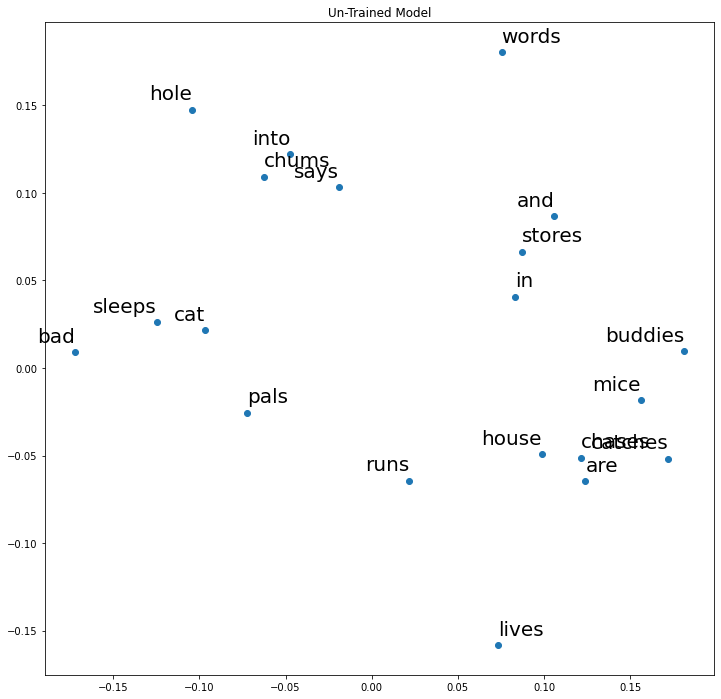

In [62]:
output = []
for i in range(test.shape[0]):
    _, wemb2 = untrained_model(torch.from_numpy(test[i]).unsqueeze(0).float().to(device)) # Here I am loading the untrained model
    wemb2 = wemb2[0].detach().cpu().numpy()
    output.append(wemb2)
print(len(output))
print(output)

xs = []
ys = []
for i in range(len(output)):
    xs.append(output[i][0])
    ys.append(output[i][1])
print(xs, ys)

docs = ['cat', 'and', 'mice', 'are', 'buddies', 'hole', 'lives', 'in', 'house', 'chases', 'catches', 'runs', 'into', 'says', 'bad', 'words', 'pals', \
        'chums', 'stores', 'sleeps']

plt.clf()
plt.figure(figsize=(12,12))
plt.scatter(xs,ys)
label = docs

for i,(x,y) in enumerate(zip(xs,ys)):
    plt.annotate(label[i], (x,y), textcoords="offset points", xytext=(0,10), fontsize=20, ha = random.choice(['left', 'right']))
    plt.title("Un-Trained Model")
plt.show()

In [63]:
import plotly
import plotly.express as px

import plotly.express as px
fig = px.scatter(x=xs, y=ys, text=docs, size_max=100)
fig.update_traces(textposition= random.choice(['top center', 'bottom center','bottom left']))
fig.update_layout(height=800,title_text='Custom Word Embeddings')
fig.show()